v2 -> data exploration for features after v1 feature engineering

In [2]:
import pandas as pd
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import warnings
pd.set_option("max_columns", 500)
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [3]:
# import features v1 dataset
data = pd.read_csv('features_v1.csv').drop('Unnamed: 0', 1)
data.columns

Index(['county', 'state', 'totalpop', 'income', 'professional', 'service',
       'office', 'drive', 'carpool', 'transit', 'workathome', 'meancommute',
       'unemployment', 'party', 'perc_men', 'perc_white', 'perc_private_work',
       'perc_citizen', 'perc_employed'],
      dtype='object')

In [4]:
data

,county,state,totalpop,income,professional,service,office,drive,carpool,transit,workathome,meancommute,unemployment,party,perc_men,perc_white,perc_private_work,perc_citizen,perc_employed
0,Los Angeles,CA,10038388.0,56196.0,0.357,0.191,0.246,0.730,0.099,0.068,0.051,0.300,0.100,D,0.492644,0.275897,0.789211,0.602363,0.461774
1,Cook,IL,5236393.0,55251.0,0.383,0.182,0.244,0.621,0.087,0.184,0.042,0.323,0.107,D,0.484541,0.438454,0.839000,0.668383,0.470487
2,Harris,TX,4356362.0,54457.0,0.347,0.174,0.235,0.792,0.111,0.029,0.033,0.282,0.075,D,0.497371,0.321501,0.834835,0.572664,0.477896
3,Maricopa,AZ,4018143.0,54229.0,0.366,0.184,0.272,0.765,0.110,0.024,0.059,0.255,0.077,R,0.494297,0.585890,0.824176,0.661961,0.453204
4,Miami-Dade,FL,2639042.0,43129.0,0.315,0.210,0.282,0.769,0.092,0.055,0.043,0.299,0.100,D,0.485108,0.152371,0.819000,0.576567,0.456556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,McPherson,NE,433.0,54306.0,0.338,0.104,0.279,0.475,0.097,0.000,0.226,0.320,0.009,R,0.515012,0.990854,0.693307,0.787529,0.512702
3041,Clark,ID,901.0,33672.0,0.229,0.206,0.120,0.677,0.156,0.000,0.038,0.170,0.039,R,0.488346,0.584337,0.744000,0.479467,0.490566
3042,Arthur,NE,448.0,39375.0,0.549,0.109,0.041,0.522,0.156,0.000,0.199,0.195,0.040,R,0.497768,1.000000,0.544000,0.694196,0.430804
3043,Kenedy,TX,565.0,36438.0,0.249,0.341,0.205,0.946,0.000,0.000,0.000,0.166,0.000,D,0.522124,0.336000,0.519000,0.559292,0.327434


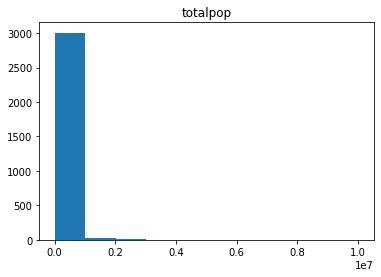

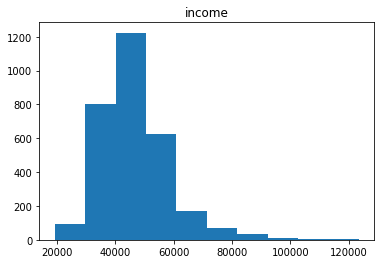

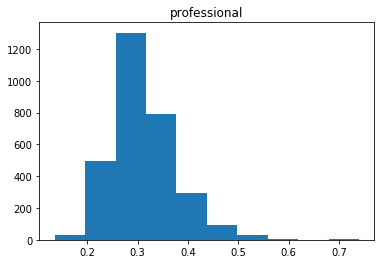

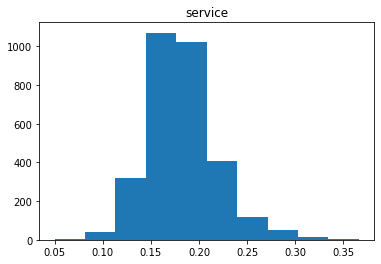

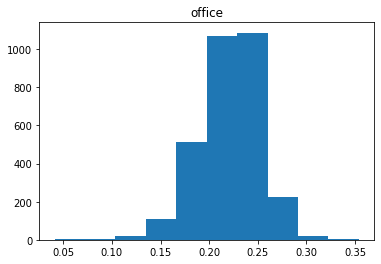

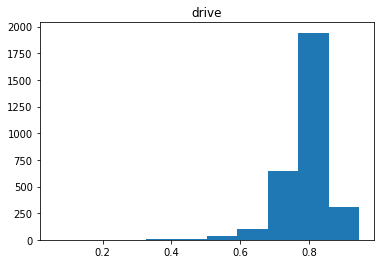

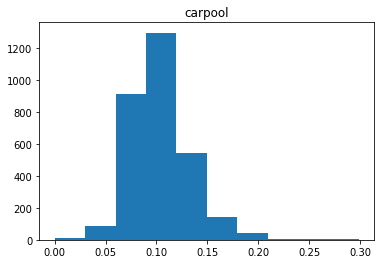

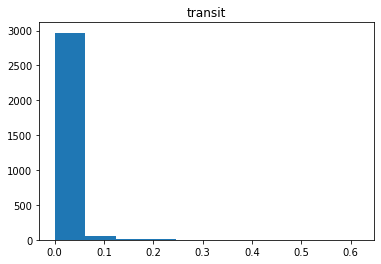

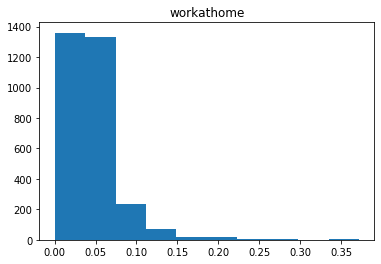

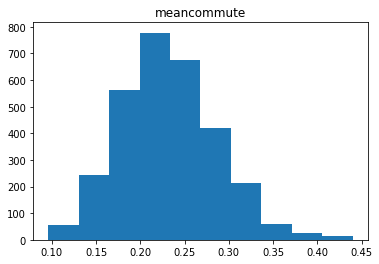

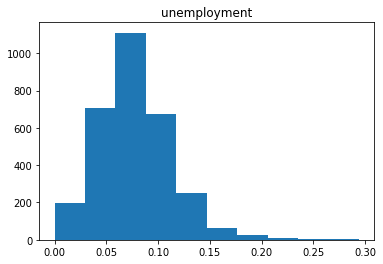

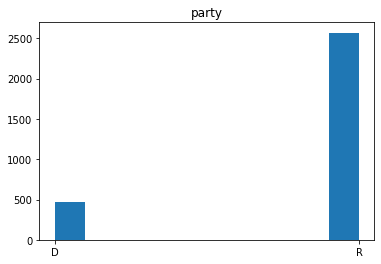

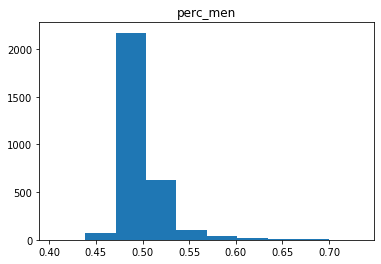

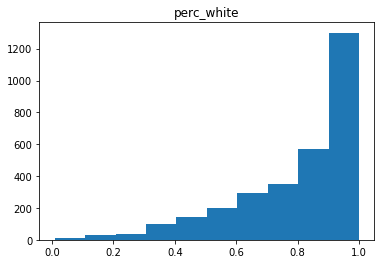

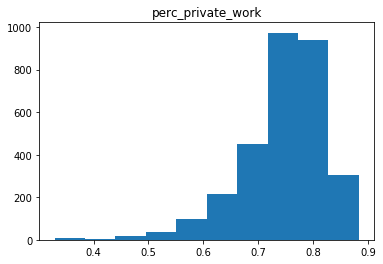

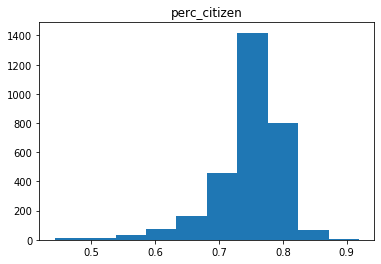

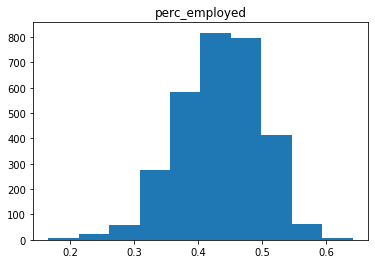

In [6]:
# distributions of all features
# means make sense for the features, some are highly correlated so will have to remove some or convert to percentages

for feature in data.columns[2:]:
    plt.hist(data[feature])
    plt.title(feature)
    plt.show()

In [16]:
# correlation matrix

corr = data.corr()
corr[corr > 0.5]

,totalpop,income,professional,service,office,drive,carpool,transit,workathome,meancommute,unemployment,perc_men,perc_white,perc_private_work,perc_citizen,perc_employed
totalpop,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,NaN,1.000000,0.615461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.667134
professional,NaN,0.615461,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500653
service,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
office,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carpool,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workathome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meancommute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# corr between transit features

# moderate corr between drive and transit

corr_transit = data[['drive', 'carpool', 'transit','meancommute']].corr()
corr_transit

,drive,carpool,transit,meancommute
drive,1.000000,-0.290034,-0.513236,0.132357
carpool,-0.290034,1.000000,-0.113006,0.096473
transit,-0.513236,-0.113006,1.000000,0.201801
meancommute,0.132357,0.096473,0.201801,1.000000


In [14]:
# corr between income features

# high correlation between professional, income, unemployment, and perc_unemployed
# will use income and unemployment as features, drop other two

corr_income = data[['income', 'professional', 'service','office', 'unemployment', 'workathome',
                   'perc_employed', 'perc_private_work',]].corr()
corr_income[abs(corr_income) > 0.4]

,income,professional,service,office,unemployment,workathome,perc_employed,perc_private_work
income,1.000000,0.615461,NaN,NaN,-0.445163,NaN,0.667134,NaN
professional,0.615461,1.000000,NaN,NaN,NaN,NaN,0.500653,NaN
service,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
office,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
unemployment,-0.445163,NaN,NaN,NaN,1.000000,NaN,-0.667524,NaN
workathome,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,-0.468749
perc_employed,0.667134,0.500653,NaN,NaN,-0.667524,NaN,1.000000,NaN
perc_private_work,NaN,NaN,NaN,NaN,NaN,-0.468749,NaN,1.000000


In [10]:
data.columns

Index(['county', 'state', 'totalpop', 'income', 'professional', 'service',
       'office', 'drive', 'carpool', 'transit', 'workathome', 'meancommute',
       'unemployment', 'party', 'perc_men', 'perc_white', 'perc_private_work',
       'perc_citizen', 'perc_employed'],
      dtype='object')

In [15]:
# corr between gender and race
    
# moderate corr between perc white and perc citizen
corr_work = data[['perc_men', 'perc_white', 'perc_citizen']].corr()
corr_work

,perc_men,perc_white,perc_citizen
perc_men,1.000000,-0.017140,0.050765
perc_white,-0.017140,1.000000,0.547878
perc_citizen,0.050765,0.547878,1.000000


In [14]:
data.columns

Index(['county', 'lead', 'state', 'totalpop', 'men', 'women', 'hispanic',
       'white', 'black', 'native', 'asian', 'pacific', 'citizen', 'income',
       'incomeerr', 'incomepercap', 'incomepercaperr', 'poverty',
       'childpoverty', 'professional', 'service', 'office', 'construction',
       'production', 'drive', 'carpool', 'transit', 'walk', 'othertransp',
       'workathome', 'meancommute', 'employed', 'privatework', 'publicwork',
       'selfemployed', 'familywork', 'unemployment'],
      dtype='object')